

<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 30px; text-align: center; line-height: 1.25;">Classification Problem<br><span style=" font-size: 48px"><b>🚢🧊🌊 Titanic🚢🧊🌊 </b>
 <hr>
    
<h1 style="font-family: Trebuchet MS; font-size: 14px; text-align: right; "><strong>Created By: Hassane Skikri</strong></h1>



<hr>
<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">Table of Contents</p>
<hr>


## **What is covered in this notebook?**

 - [**1 - Importing Libraries**](#1d)
 - [**2 - Loading Dataset**](#2)
 - [**3 - Exploring the data**](#3)
 - [**4 - Data Preprocessing**](#4)
 - [**5 - Feature Scaling**](#5)
 - [**6 - Model Building and Evaluation**](#6)
 - [**7 - Hyperparameter Tuning**](#7)
 - [**8 -  Model Evaluation on Test Data**](#8)
 - [**9 - Preparing the Final Submission:**](#9)
<hr>

<h1 style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">1️⃣ - Importing libraries</h1>
<hr>


In [1]:
# Data Analysis and Manipulation Libraries Import
import numpy as np 
import pandas as pd 

# Data Visualization Libraries Import
import  matplotlib.pyplot as plt
import seaborn as sns

#Splitting the data
from sklearn.model_selection import StratifiedShuffleSplit

#Custom Transformer Class for Data Imputation 
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer

#encoding
from sklearn.preprocessing import OneHotEncoder

#calling the pipeline
from sklearn.pipeline import Pipeline

#Scaling
from sklearn.preprocessing import StandardScaler

#build the model

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV,StratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

#ignore all the warning 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#display Matplotlib plots directly within the notebook
%matplotlib inline
# display graphs correctly
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['figure.dpi'] = 120


plt.style.use('dark_background')



<hr>
<h1 style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">2️⃣ - Loading Dataset</h1>
<a name = 2d > </a>
<hr>


In [4]:
titanic = pd.read_csv('..Data/train.csv')
titanic_test = pd.read_csv('..Data/test.csv')
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [5]:
titanic.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

In [6]:
titanic.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64


<h1 style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">3️⃣ - Exploring the data</h1>
<a name = 3 ></a>
<hr>


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### **From this information, we can summarize:**
- **There are categorical features in the data. So we need to encode them into numeric features.**
- **3 column has missing values.**


## **Visualizing the correlations**

<Axes: >

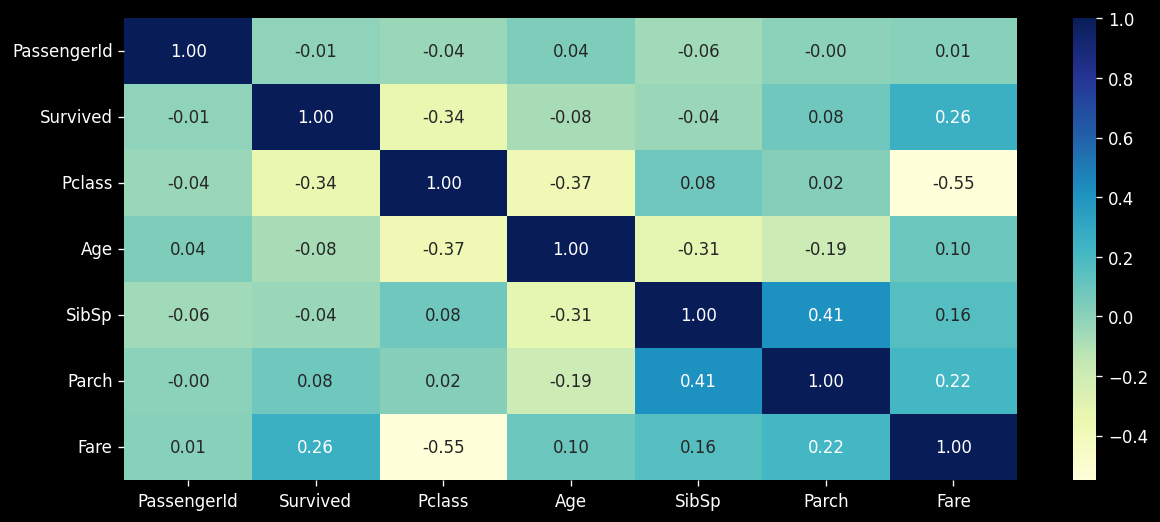

In [10]:
# Select only numeric columns
numeric_columns = titanic.select_dtypes(include=['number'])

# Calculate correlations and create the heatmap
corr = numeric_columns.corr()
sns.heatmap(corr, annot=True, fmt='.2f',cmap="YlGnBu")

***we can conclude that there is a small reverse corrolation between the Pclass and the Survived column***

<hr>
<h1 style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">4️⃣ - Data Preprocessing</h1>
<a name = 4 ></a>
<hr>


## Splitting the data into training and testing sets using stratified sampling.

In [11]:
# Create an instance of StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1 , test_size =0.2)   #20%  testing data
#titanic[["Survived","Pclass","Sex"]] my target labels  is maintained in both the training and testing sets
for train_index, test_index in split.split(titanic,titanic[["Survived","Pclass","Sex"]]):
    strat_train = titanic.loc[train_index]
    strat_test = titanic.loc[test_index]
# Now, you have the train and test sets with stratified sampling

<Axes: xlabel='Survived', ylabel='Count'>

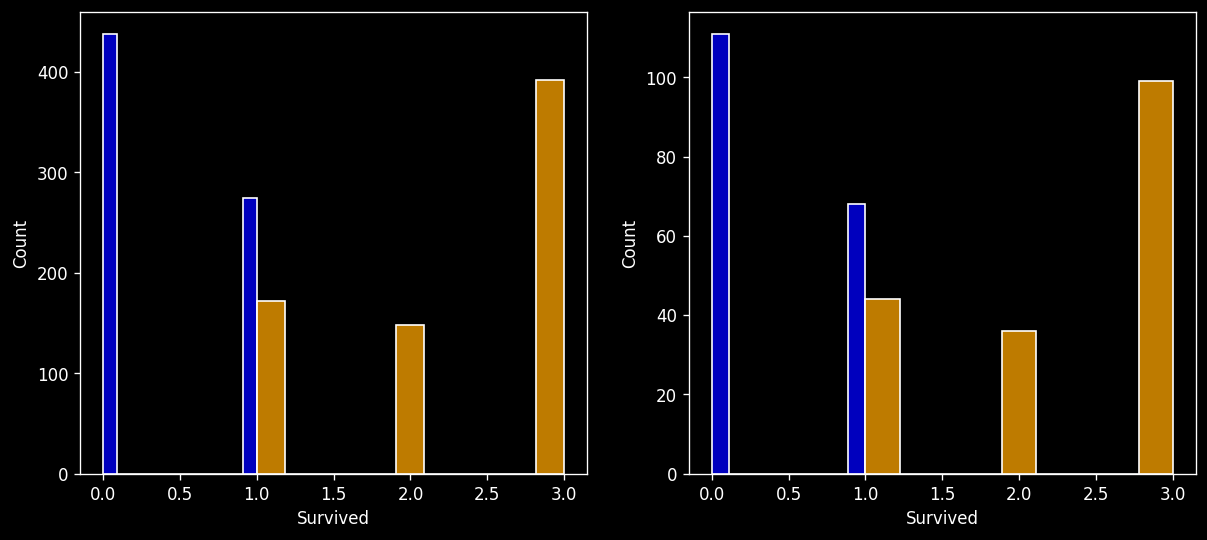

In [12]:
plt.subplot(1,2,1)
sns.histplot(strat_train['Survived'],color='blue')
sns.histplot(strat_train['Pclass'],color='orange')
plt.subplot(1,2,2)
sns.histplot(strat_test['Survived'],color='blue')
sns.histplot(strat_test['Pclass'],color='orange')


In [13]:
strat_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 176 to 504
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          562 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        162 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


**we can see that the age has a lot of missing value**
<br>
**the cabin column isn't important so we will drop it**

## Handling missing values in the Age column.

In [14]:
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit (self, X,y=None):
        return self
    def transform(self,X):
        imputer = SimpleImputer(strategy = "mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [15]:
strat_train["Embarked"].unique()

array(['S', 'Q', 'C', nan], dtype=object)

## Encoding categorical features ('Embarked' and 'Sex')

In [16]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit (self,X):
        return self
    def transform(self,X):
        encoder = OneHotEncoder()
        
        matrix= encoder.fit_transform(X[['Embarked']]).toarray()
        columns = ["C","S","Q","N"]
        for i in range(len(matrix.T)):
            X[columns[i]]= matrix.T[i]
        
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
        columns = ["Female","Male"]
        for i in range(len(matrix.T)):
            X[columns[i]]= matrix.T[i]
        return X

## Dropping unnecessary columns.

In [17]:
#feature dropper

class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self , X , y =None):
        return self
    def transform(self , X ):
        return X.drop(["Name","Sex","Embarked","Ticket","Cabin","N"], axis =1, errors = "ignore")


## Pipeline

In [18]:
pipeline = Pipeline([("ageimputer",AgeImputer()),
                    ("featureencoder",FeatureEncoder()),
                    ("featuredropper",FeatureDropper())])

In [19]:
strat_train = pipeline.fit_transform(strat_train)

In [20]:
strat_train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
176,177,0,3,29.342687,3,1,25.4667,0.0,0.0,1.0,0.0,1.0
468,469,0,3,29.342687,0,0,7.7250,0.0,1.0,0.0,0.0,1.0



<hr>

<h1 style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">5️⃣ - Feature Scaling</h1>
<a name = 5 ></a>
<hr>


In [21]:
y = strat_train.iloc[:, -1]
X = strat_train.drop(columns='Survived')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)



<hr>

<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">6️⃣ - Model Building and Evaluation</p>
<a name = 6 ></a>
<hr>


In [23]:

models = []
models.append(('LogisticRegression',LogisticRegression(solver ='liblinear',multi_class = 'ovr')))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVM',SVC(gamma = 'auto')))
    

## Selecting the best model based on performance.

In [24]:
results = []
names = []

best_model = None
best_score = 0  

for name, model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results['test_score'])
    names.append(name)
    
    mean_score = cv_results['test_score'].mean()
    std_score = cv_results['test_score'].std()
    
    print(f"{name}: Mean Accuracy = {mean_score:.4f} (Std = {std_score:.4f})")
    
    if mean_score > best_score:
        best_score = mean_score
        best_model = model

print(f"The best model is {best_model.__class__.__name__} with a mean accuracy of {best_score:.4f}")

LogisticRegression: Mean Accuracy = 1.0000 (Std = 0.0000)
RandomForestClassifier: Mean Accuracy = 1.0000 (Std = 0.0000)
DecisionTreeClassifier: Mean Accuracy = 1.0000 (Std = 0.0000)
KNeighborsClassifier: Mean Accuracy = 0.6037 (Std = 0.0737)
KNeighborsClassifier: Mean Accuracy = 0.6037 (Std = 0.0737)
LinearDiscriminantAnalysis: Mean Accuracy = 0.6908 (Std = 0.0371)
GaussianNB: Mean Accuracy = 1.0000 (Std = 0.0000)
SVM: Mean Accuracy = 0.6656 (Std = 0.0180)
The best model is LogisticRegression with a mean accuracy of 1.0000


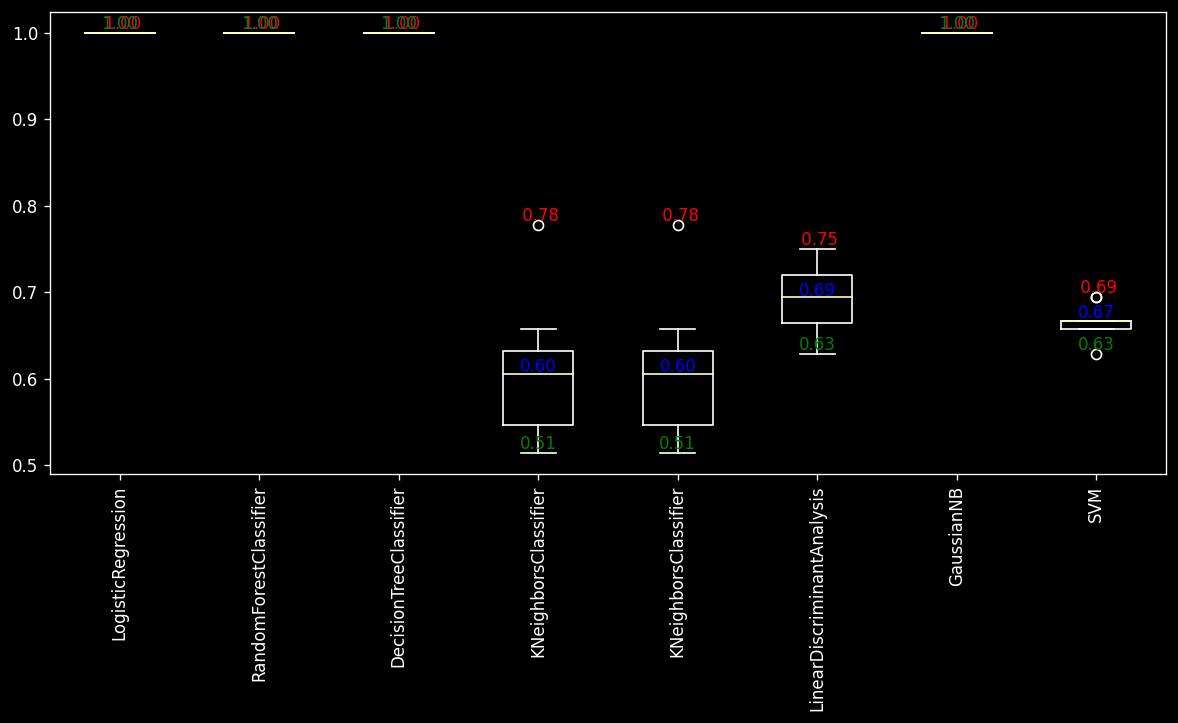

In [25]:
plt.boxplot(results,labels = names)
plt.xticks(rotation=90)
plt.title =('Models comparison')
# Annotate the mean, max, and min of each box with accuracy values
for i in range(len(names)):
    x = i + 1  # x-coordinate of the annotation
    data = results[i]  
    mean_value = np.mean(data)
    max_value = np.max(data)
    min_value = np.min(data)
    
    # Annotate mean value
    plt.text(x, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', fontsize=10, color='blue')
    
    # Annotate max value
    plt.text(x, max_value, f' {max_value:.2f}', ha='center', va='bottom', fontsize=10, color='red')
    
    # Annotate min value
    plt.text(x, min_value, f'{min_value:.2f}', ha='center', va='bottom', fontsize=10, color='green')

plt.show()

In [26]:
print("X_train_data shape:", X_train.shape)
print("y_train_data shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train_data shape: (356, 11)
y_train_data shape: (356,)
X_test shape: (356, 11)
y_test shape: (356,)



<hr>

<h1 style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">7️⃣ - Hyperparameter Tuning</h1>
<a name = 7 ></a>
<hr>


In [27]:
#grid search cv

clf = RandomForestClassifier()
parameters = [
    {
    'n_estimators': [10, 100, 700],
    'max_depth': [None, 5],
    'min_samples_split': [2, 3, 4],
    }
]
grid_search = GridSearchCV(clf,parameters,cv = 3,scoring =  "accuracy",return_train_score = True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 700]}],
             return_train_score=True, scoring='accuracy')

In [28]:
best_estimator =grid_search.best_estimator_
best_estimator

RandomForestClassifier(n_estimators=10)



<hr>

<h1 style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">8️⃣ -  Model Evaluation on Test Data</h1>

<a name = 8 ></a>
<hr>



In [29]:
strat_test =pipeline.fit_transform(strat_test)
strat_test

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
173,174,0,3,21.000000,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
66,67,1,2,29.000000,0,0,10.5000,0.0,0.0,1.0,1.0,0.0
340,341,1,2,2.000000,1,1,26.0000,0.0,0.0,1.0,0.0,1.0
38,39,0,3,18.000000,2,0,18.0000,0.0,0.0,1.0,1.0,0.0
470,471,0,3,31.016974,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
749,750,0,3,31.000000,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
369,370,1,1,24.000000,0,0,69.3000,1.0,0.0,0.0,1.0,0.0
160,161,0,3,44.000000,0,1,16.1000,0.0,0.0,1.0,0.0,1.0
125,126,1,3,12.000000,1,0,11.2417,1.0,0.0,0.0,0.0,1.0


In [30]:
X_test = strat_test .drop ( ['Survived'],axis = 1)
Y_test = strat_test ['Survived']

scaler = StandardScaler()
X_test_data =scaler.fit_transform(X_test)
Y_test_data = Y_test.to_numpy()


In [31]:
Score =best_estimator.score(X_test_data,Y_test_data)
Score

0.2122905027932961



<hr>

<h1 style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">9️⃣ - Preparing the Final Submission</h1>
<a name = 9 ></a>
<hr>




In [32]:
#applay the prediction for all the data

final_data =pipeline.fit_transform(titanic)
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [33]:
X_final = final_data.drop (['Survived'],axis =1)
Y_final = final_data['Survived']

scaler =StandardScaler()
X_final_Scal = scaler.fit_transform(X_final)
Y_final_Scal = Y_final.to_numpy()

In [34]:
clf_final = RandomForestClassifier()
parameters = [
    {
    'n_estimators': [10, 100, 700],
    'max_depth': [None, 5],
    'min_samples_split': [2, 3, 4],
    }
]

grid_search = GridSearchCV(clf_final,parameters,cv = 3,scoring =  "accuracy",return_train_score = True)
grid_search.fit(X_final_Scal,Y_final_Scal)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 700]}],
             return_train_score=True, scoring='accuracy')

In [35]:
final_best_estimator= grid_search.best_estimator_
final_best_estimator

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=700)

In [36]:
accuracy = final_best_estimator.score(X_final_Scal, Y_final_Scal)
accuracy

0.8507295173961841

In [37]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
 final_test =pipeline.fit_transform(titanic_test)

In [39]:
final_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [40]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


**we nead to fit the missing value in the Fare culomn**

In [41]:
X_final_test = final_test
X_final_test  =X_final_test.fillna(method = "ffill") #tack the next value

scaler = StandardScaler()
X_final_test_Scal = scaler.fit_transform(X_final_test)

In [42]:
X_final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [43]:
X_final_test_Scal

array([[-1.72791209,  0.87348191,  0.3349926 , ..., -1.35067551,
        -0.75592895,  0.75592895],
       [-1.71962474,  0.87348191,  1.32553003, ...,  0.74037028,
         1.32287566, -1.32287566],
       [-1.71133739, -0.31581919,  2.51417495, ..., -1.35067551,
        -0.75592895,  0.75592895],
       ...,
       [ 1.71133739,  0.87348191,  0.65196458, ...,  0.74037028,
        -0.75592895,  0.75592895],
       [ 1.71962474,  0.87348191,  0.        , ...,  0.74037028,
        -0.75592895,  0.75592895],
       [ 1.72791209,  0.87348191,  0.        , ..., -1.35067551,
        -0.75592895,  0.75592895]])

In [44]:
predictions_final = final_best_estimator.predict(X_final_test_Scal)

In [45]:
predictions_final

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
final_df = pd.DataFrame(titanic_test['PassengerId'])
final_df['Survived'] = predictions_final
final_df.to_csv("/kaggle/working/data_predictions.csv",index =False)


<h1 style="font-family: Trebuchet MS; font-size: 20px; text-align: center; ">
  <b>If you have any feedback or suggestions on how to enhance the model's performance, please feel free to share them in the comments below. Your insights are valuable and can help us refine our approach to achieve better results.</b>
</h1>


<h1 style="font-family: Trebuchet MS; font-size: 30px; text-align: center; "><b>Thank You</b></h1>

![](https://th.bing.com/th/id/R.aa0cb7114d1a63ed120358fac6bd380a?rik=ZP6CtisZ1J4sIQ&pid=ImgRaw&r=0)